## Bessel functions of real order(jv, jn_zeros)

Bessel functions are a family of solutions to `Bessel's differential equation` with real or complex order `alpha`:

$x^2 \frac{d^2 y}{dx^2} + x \frac{dy}{dx} + (x^2 - \alpha^2)y = 0$

Among other uses, these functions arise in wave propagation problems, such as the vibrational modes of a thin drum head. Here is an example of a circular drum head anchored at the edge:

In [1]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt

In [2]:
def drummed_height(n, k, distance, angle, t):
    kth_zero = special.jn_zeros(n, k)[-1]
    return np.cos(t) * np.cos(n * angle) * special.jn(n, distance * kth_zero)

In [3]:
theta = np.r_[0:2*np.pi:50j]
radius = np.r_[0:1:50j]

In [4]:
x = np.array([r * np.cos(theta) for r in radius])
y = np.array([r * np.sin(theta) for r in radius])
z = np.array([drummed_height(1, 1, r, theta, 0.5) for r in radius])

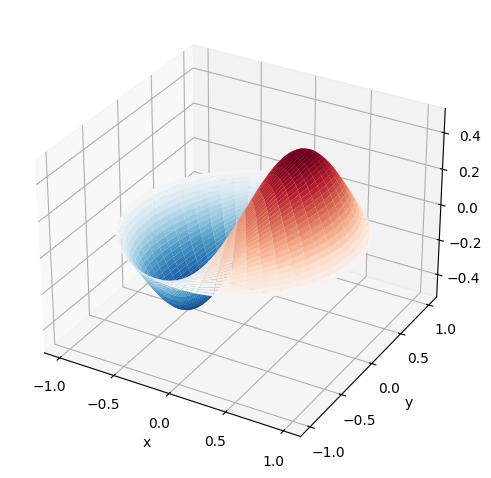

In [5]:
fig = plt.figure()

ax = fig.add_axes(rect=(0, 0.05, 0.95, 0.95), projection="3d")
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap="RdBu_r", vmin=-0.5, vmax=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_xticks(np.arange(-1, 1.1, 0.5))
ax.set_yticks(np.arange(-1, 1.1, 0.5))
plt.show()